In [1]:
# Install libraries

# %pip install nltk
# %pip install contractions
# %pip install textblob
# %pip install wordcloud 
# %pip install lightgbm 

In [2]:
# Import libraries

import pandas as pd
import numpy as np
import contractions

# Cleaning libraries

import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Lemmatization

from nltk.stem import WordNetLemmatizer

#EDA 

from textblob import Word
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

# Convert Text to Numerical Values

from sklearn.feature_extraction.text import TfidfVectorizer

# Balance the Dataset
from imblearn.over_sampling import SMOTE

# 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import Counter

# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from scipy.sparse import hstack

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dooterior/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/dooterior/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
df = pd.read_csv('Airline-Sentiment.csv')
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,airline_sentiment,airline_sentiment:confidence,negativereason,negativereason:confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,681448150,False,finalized,3,2/25/15 5:24,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2/24/15 11:35,5.703060e+17,NaN,Eastern Time (US & Canada)
1,681448153,False,finalized,3,2/25/15 1:53,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2/24/15 11:15,5.703010e+17,NaN,Pacific Time (US & Canada)
2,681448156,False,finalized,3,2/25/15 10:01,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2/24/15 11:15,5.703010e+17,Lets Play,Central Time (US & Canada)
3,681448158,False,finalized,3,2/25/15 3:05,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2/24/15 11:15,5.703010e+17,NaN,Pacific Time (US & Canada)
4,681448159,False,finalized,3,2/25/15 5:50,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2/24/15 11:14,5.703010e+17,NaN,Pacific Time (US & Canada)


In [4]:
# Read in data

df = df[['text', 'airline_sentiment', 'airline']]
df.head()

,text,airline_sentiment,airline
0,@VirginAmerica What @dhepburn said.,neutral,Virgin America
1,@VirginAmerica plus you've added commercials t...,positive,Virgin America
2,@VirginAmerica I didn't today... Must mean I n...,neutral,Virgin America
3,@VirginAmerica it's really aggressive to blast...,negative,Virgin America
4,@VirginAmerica and it's a really big bad thing...,negative,Virgin America


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   text               14640 non-null  object
 1   airline_sentiment  14640 non-null  object
 2   airline            14640 non-null  object
dtypes: object(3)
memory usage: 343.3+ KB


#### Data Cleaning

In [6]:
# Download stopwords
nltk.download('stopwords')
nltk.download('punkt')

# Initialize stopwords list
stop_words = set(stopwords.words('english'))

# Function to clean text
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()

    #fix contracted words
    text = contractions.fix(text)
    
    # Remove mentions, hashtags, URLs
    text = re.sub(r'@\w+|#\w+|http\S+', '', text)
    
    # Remove special characters and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    
    # Tokenization
    tokens = word_tokenize(text, preserve_line=True)
    
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    
    # Join tokens back to a single string
    clean_text = ' '.join(tokens)
    
    return clean_text

# Apply the cleaning function to your text column
df['cleaned_text'] = df['text'].apply(clean_text)

# View the cleaned data

df[['text', 'cleaned_text']].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dooterior/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/dooterior/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,text,cleaned_text
0,@VirginAmerica What @dhepburn said.,said
1,@VirginAmerica plus you've added commercials t...,plus added commercials experience tacky
2,@VirginAmerica I didn't today... Must mean I n...,today must mean need take another trip
3,@VirginAmerica it's really aggressive to blast...,really aggressive blast obnoxious entertainmen...
4,@VirginAmerica and it's a really big bad thing...,really big bad thing


#### Lemmatization

In [7]:
nltk.download('wordnet')  # Download WordNet corpus 
nltk.download('omw-1.4')  # Download wordnet dependencies

# Define the lemmatize function
def lemmatize(text):
    lemmatizer = WordNetLemmatizer()
    # Tokenize the text into individual words
    words = text.split()  
    # Lemmatize each word and return the result as a list
    lemmatized_words = [lemmatizer.lemmatize(w) for w in words]
    return ' '.join(lemmatized_words)

# Apply the lemmatize function to the text column
df['lemmatized_words'] = df['cleaned_text'].apply(lemmatize)

# Display the updated dataframe
df[['cleaned_text', 'lemmatized_words']].head()

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/dooterior/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/dooterior/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,cleaned_text,lemmatized_words
0,said,said
1,plus added commercials experience tacky,plus added commercial experience tacky
2,today must mean need take another trip,today must mean need take another trip
3,really aggressive blast obnoxious entertainmen...,really aggressive blast obnoxious entertainmen...
4,really big bad thing,really big bad thing


In [8]:
df = df.drop("cleaned_text", axis=1)
df = df.rename(columns={"lemmatized_words": "cleaned_text"})

In [9]:
# Map sentiments to numerical values
airline_maps = {'Virgin America':1, 'United':2, 'Southwest':3, 'Delta':4, 'US Airways':5, 'American':6}
df['airline_encode'] = df['airline'].map(airline_maps)

# Map sentiments to numerical values
sentiment_mapping = {'positive': 1, 'neutral': 0, 'negative': -1}
df['sentiment_label'] = df['airline_sentiment'].map(sentiment_mapping)

#### EDA

/var/folders/xy/b785rtgn795129srfj5kb0mc0000gn/T/ipykernel_38435/1477874928.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


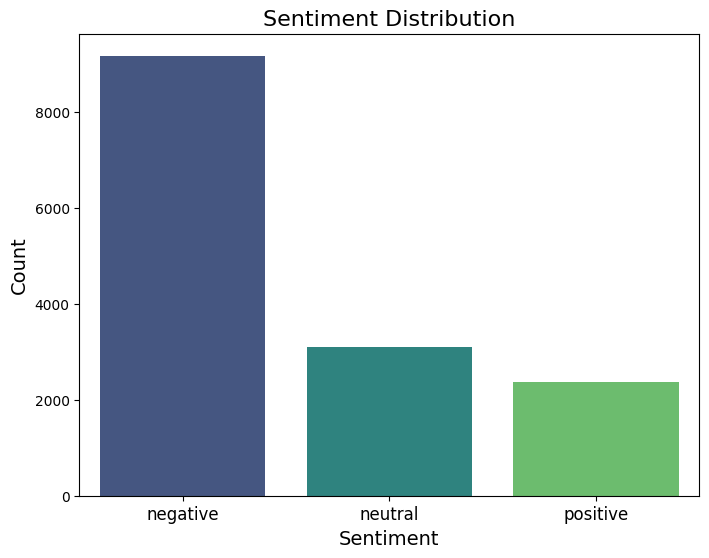

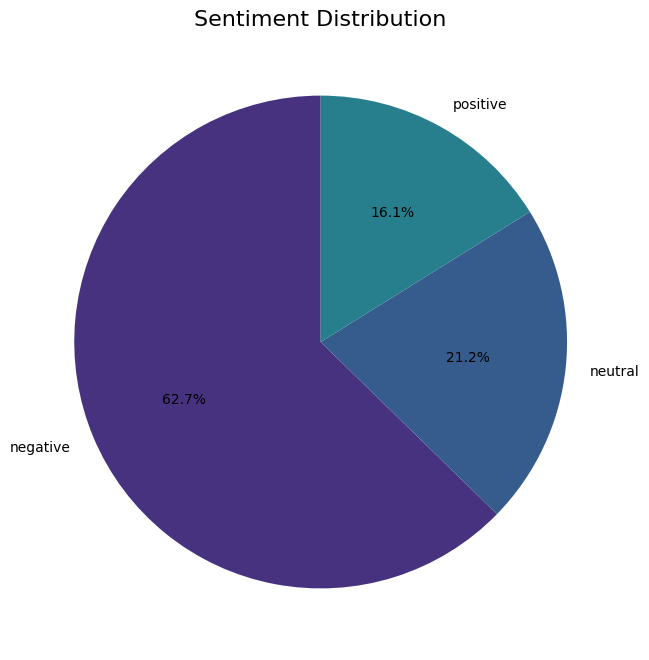

In [10]:
sentiment_counts = df['airline_sentiment'].value_counts()

# Bar plot
plt.figure(figsize=(8,6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Sentiment Distribution', fontsize=16)
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.show()

# Pie chart (optional)
plt.figure(figsize=(8,8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis'))
plt.title('Sentiment Distribution', fontsize=16)
plt.show()

In [11]:
# Frequency of occurrence of each airline

airline_dist = df['airline'].value_counts()
airline_dist

airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: count, dtype: int64

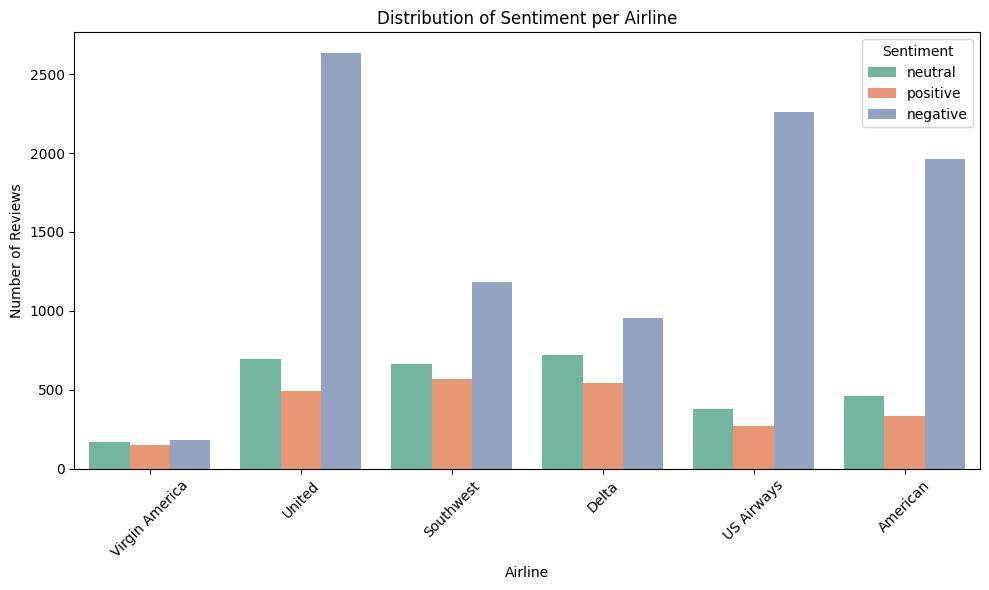

In [12]:
# Visualize sentiment distribution per airline

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='airline', hue='airline_sentiment', palette='Set2')
plt.title('Distribution of Sentiment per Airline')
plt.xticks(rotation=45)
plt.xlabel('Airline')
plt.ylabel('Number of Reviews')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

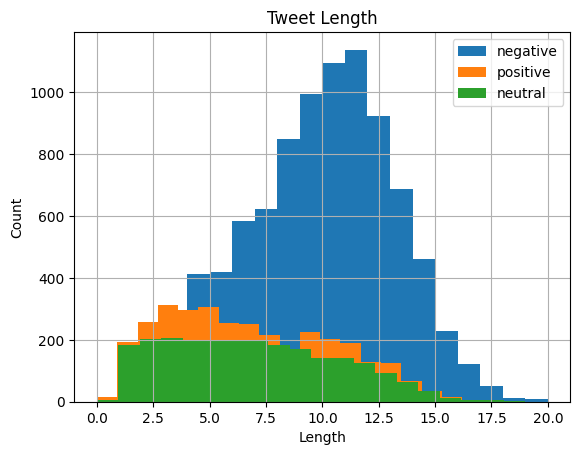

In [13]:
# Create a figure for text length analysis
ch_dist = plt.figure()

# Plot histograms of text length for different sentiment classes
df[df['airline_sentiment'] == 'negative']['cleaned_text'].str.split().apply(len).hist(bins=20, legend=True)
df[df['airline_sentiment'] == 'neutral']['cleaned_text'].str.split().apply(len).hist(bins=20, legend=True)
df[df['airline_sentiment'] == 'positive']['cleaned_text'].str.split().apply(len).hist(bins=20, legend=True)

# Comment on text length distribution
# There is a fairly even distribution of text length across different sentiment classes.

# Set titles and labels for the text length analysis
plt.title("Tweet Length")
plt.xlabel("Length")
plt.ylabel("Count")

# Add a legend
plt.legend(['negative', 'positive', 'neutral'])

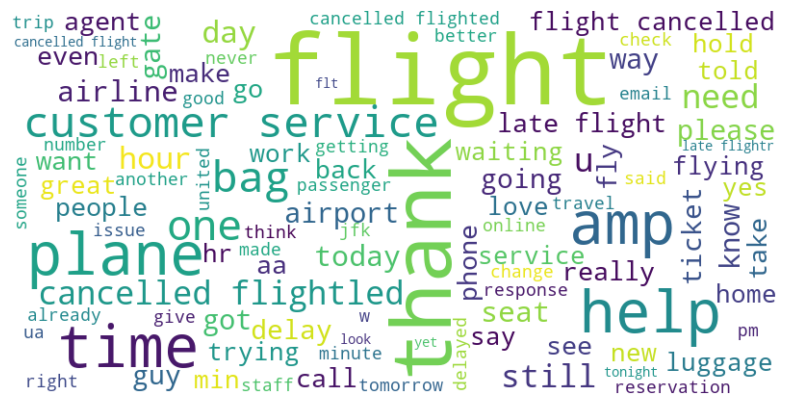

In [14]:
# generate a worcloud to visualize common words

words = " ".join(df['cleaned_text'])

wordcloud = WordCloud( width=800, 
    height=400, 
    max_font_size=100, 
    max_words=100, 
    background_color='white',
    colormap='viridis', 
).generate(words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.show()

#### Explore the majority sentiment - Negative Sentiments

In [15]:
negative_reviews = df[df['airline_sentiment'] == 'negative']
negative_reviews.head()

,text,airline_sentiment,airline,cleaned_text,airline_encode,sentiment_label
3,@VirginAmerica it's really aggressive to blast...,negative,Virgin America,really aggressive blast obnoxious entertainmen...,1,-1
4,@VirginAmerica and it's a really big bad thing...,negative,Virgin America,really big bad thing,1,-1
5,@VirginAmerica seriously would pay $30 a fligh...,negative,Virgin America,seriously would pay flight seat playing really...,1,-1
15,@VirginAmerica SFO-PDX schedule is still MIA.,negative,Virgin America,sfopdx schedule still mia,1,-1
17,@VirginAmerica I flew from NYC to SFO last we...,negative,Virgin America,flew nyc sfo last week could fully sit seat du...,1,-1


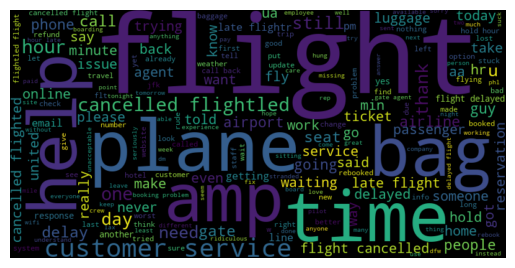

In [16]:
# For negative sentiment
wordcloud_negative = WordCloud(width=800, height=400).generate(' '.join(negative_reviews['cleaned_text']))

# Visualize it
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.show()

In [17]:
# Use CountVectorizer to find the most common unigrams in negative reviews
vectorizer = CountVectorizer(stop_words='english', max_features=20)  # Limiting to top 20 most common words
X_neg_unigrams = vectorizer.fit_transform(negative_reviews['text'])
unigram_features = vectorizer.get_feature_names_out()

# Sum the occurrences of each unigram
unigram_counts = X_neg_unigrams.toarray().sum(axis=0)

# Display the most frequent unigrams
unigram_freq = pd.DataFrame({'unigram': unigram_features, 'count': unigram_counts})
unigram_freq = unigram_freq.sort_values(by='count', ascending=False)
print(unigram_freq)

         unigram  count
5         flight   2943
18        united   2899
19     usairways   2375
0    americanair   2110
16  southwestair   1214
12       jetblue   1052
2      cancelled    926
15       service    750
10         hours    649
13          just    621
7           help    619
3       customer    614
8           hold    614
17          time    597
14         plane    531
4        delayed    508
1            amp    503
9           hour    452
6      flightled    448
11          http    437


In [18]:
# Use CountVectorizer to find the most common bigrams in negative reviews
bigram_vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english', max_features=20)
X_neg_bigrams = bigram_vectorizer.fit_transform(negative_reviews['text'])
bigram_features = bigram_vectorizer.get_feature_names_out()

# Sum the occurrences of each bigram
bigram_counts = X_neg_bigrams.toarray().sum(axis=0)

# Display the most frequent bigrams
bigram_freq = pd.DataFrame({'bigram': bigram_features, 'count': bigram_counts})
bigram_freq = bigram_freq.sort_values(by='count', ascending=False)
print(bigram_freq)

                   bigram  count
5        customer service    450
4     cancelled flightled    448
13            late flight    221
3      cancelled flighted    204
6        flight cancelled    196
14           late flightr    145
2        cancelled flight    124
7          flight delayed    104
15          united flight    102
1        booking problems     97
0      americanair flight     93
9        flightled flight     93
16  usairways americanair     90
17       usairways flight     85
12             hold hours     82
19                ve hold     66
11              hold hour     66
10             gate agent     62
18         usairways hold     59
8           flight flight     58


#### Base Model

#### Logistic Regression

In [19]:
# Vectorize the 'cleaned_text' column
vectorizer = CountVectorizer()
X_text = vectorizer.fit_transform(df['cleaned_text'])  # Transform text into bag-of-words

# Combine the vectorized text data with the airline_encoded column
X_combined = hstack([X_text, df[['airline_encode']]])

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_combined, df['sentiment_label'], test_size=0.2, random_state=42)

# Train the Logistic Regression Model
base_model = LogisticRegression(max_iter=10000)
base_model.fit(X_train, y_train)

# Make Predictions and Evaluate the Model
y_pred = base_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('LogisticRegression:')
print(f"Accuracy: {accuracy}")
# print(classification_report(y_test, y_pred))

# Calculate and display the weighted F1 score
print('Weighted f1-score:', f1_score(y_pred, y_test, average='weighted'))

# Display the confusion matrix
confusion_matrix(y_pred, y_test)

LogisticRegression:
Accuracy: 0.798155737704918
Weighted f1-score: 0.8006121307122444


array([[1683,  193,   79],
       [ 151,  335,   61],
       [  55,   52,  319]])

In [20]:
# Vectorize the 'cleaned_text' column (CountVectorizer -> dense matrix)
vectorizer = CountVectorizer()
X_text = vectorizer.fit_transform(df['cleaned_text']).todense()  # Convert to dense matrix
X_text = np.asarray(X_text)  # Convert to a NumPy array

# Combine the text features (X_text) with 'airline_encode'
X_combined = np.hstack([X_text, df[['airline_encode']].values])

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_combined, df['sentiment_label'], test_size=0.2, random_state=42)

# Initialize the Multinomial Naive Bayes classifier
nb = MultinomialNB()

# Train the model on the training data
model = nb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('MultinomialNB:')
print(f"Accuracy: {accuracy}")

# Calculate and display the weighted F1 score
print("Weighted F1 Score:", f1_score(y_test, y_pred, average='weighted'))

# Display the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

MultinomialNB:
Accuracy: 0.766051912568306
Weighted F1 Score: 0.7487532396733312
Confusion Matrix:
[[1753   91   45]
 [ 303  234   43]
 [ 160   43  256]]


#### Balancing the dataset

In [21]:
# Convert text data into numerical values using TF-IDF
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(df['cleaned_text'])

# Convert the 'airline_encode' feature to a sparse matrix for compatibility with the TF-IDF data
X_airline = df[['airline_encode']].values

# Combine the TF-IDF features with the airline_encoded feature
X_combined = hstack([X_tfidf, X_airline])

# The sentiment labels
y = df['sentiment_label']

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the combined features (X_combined) and the sentiment labels (y)
X_smote, y_smote = smote.fit_resample(X_combined, y)

# Check the balance of the resampled target variable
pd.Series(y_smote).value_counts()

sentiment_label
 0    9178
 1    9178
-1    9178
Name: count, dtype: int64

#### Creating N-grams

['aa abidfw' 'aa able' 'aa ac' 'aa account' 'aa advantage' 'aa agent'
 'aa air' 'aa airline' 'aa airplane' 'aa also' 'aa always' 'aa amp'
 'aa another' 'aa app' 'aa around' 'aa automated' 'aa avoided' 'aa award'
 'aa aware' 'aa awesome' 'aa bag' 'aa behalf' 'aa believe' 'aa cancelled'
 'aa changed' 'aa charge' 'aa considering' 'aa contact' 'aa contacted'
 'aa cool' 'aa credit' 'aa cstmr' 'aa currently' 'aa customer' 'aa cx'
 'aa dallas' 'aa dart' 'aa delayed' 'aa delaypending' 'aa departing']


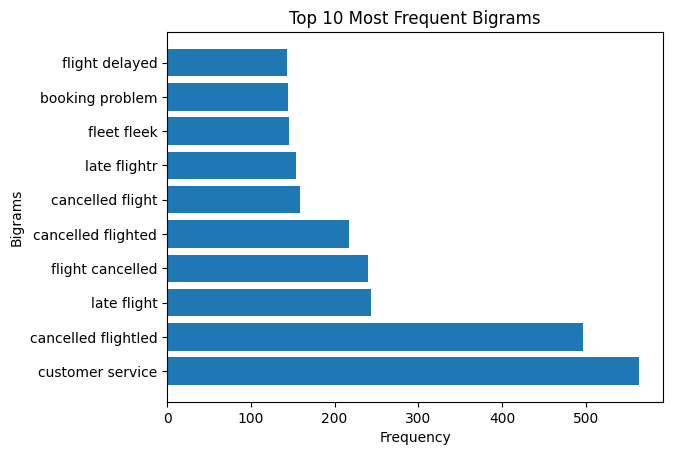

In [22]:
# Use CountVectorizer for bi-gram generation

text_data = df['cleaned_text']

vectorizer = CountVectorizer(ngram_range=(2, 2))
X_bigrams = vectorizer.fit_transform(text_data)

# print list of first 40 bi-grams
ngram_features = vectorizer.get_feature_names_out()
print(ngram_features[:40])

# Get the bigram counts
bigram_counts = X_bigrams.sum(axis=0).A1
bigram_features = vectorizer.get_feature_names_out()

# Create a dictionary of bigrams and their counts
bigram_freq = dict(zip(bigram_features, bigram_counts))

# Get the top 10 bigrams
top_bigrams = Counter(bigram_freq).most_common(10)

# Plot the bigrams
bigrams, counts = zip(*top_bigrams)
plt.barh(bigrams, counts)
plt.xlabel('Frequency')
plt.ylabel('Bigrams')
plt.title('Top 10 Most Frequent Bigrams')
plt.show()

['aadavantage mile' 'aadvantage dividend' 'aadvantage membership'
 'aadvantage mile' 'aadvantage mileage' 'aadvantage number'
 'aadvantage reservation' 'aadvantage status' 'aadvantage travel'
 'aadvantage website' 'abandon overnight' 'abandoned boston'
 'abandoned depart' 'abandonment horrible' 'abassinet son'
 'abducted child' 'ability anywhere' 'ability hopefully' 'ability look'
 'ability make' 'ability prepare' 'ability rebook' 'ability switch'
 'aboard boeing' 'aboard flight' 'aboard gross' 'aboout cancelled'
 'abounds good' 'abroad flight' 'absolute best' 'absolute crap'
 'absolute delight' 'absolute disaster' 'absolute disgrace'
 'absolute disregard' 'absolute garbage' 'absolute jewel' 'absolute joke'
 'absolute joker' 'absolute madness']


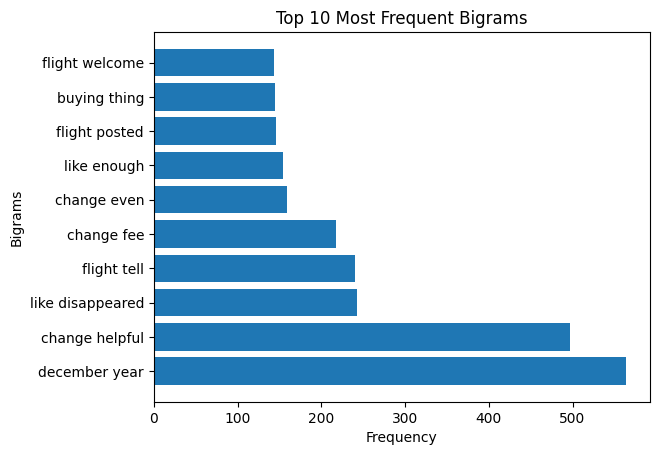

In [23]:
# Custom stop words to get rid of irrelevant words
custom_stop_words = ['aa', 'ab', 'ac', 'fi', 'hr', 'pr', 'aal', 'abq', 'abc', 'lga', 'est', 
                     'pbi', 'tel', 'able', 'abcdef', 'abi', 'aaus', 'aback', 'aaso', 'take',
                     'aano', 'aaron', 'tampa', 'also', 'aaaand', 'aaba', 'aaba', 'aampc', 'pmcan', 
                     'aadv', 'aadfw', 'dallas', 'cstmr', 'abidfw', 'cx', 'amp', 'anext']

vectorizer = CountVectorizer(ngram_range=(2,2), stop_words=custom_stop_words)
text_data = df['cleaned_text']
X = vectorizer.fit_transform(text_data)

ngram_features = vectorizer.get_feature_names_out()
print(ngram_features[:40])

# Get the bigram counts
bigram_counts = X_bigrams.sum(axis=0).A1
ngram_features = vectorizer.get_feature_names_out()

# Create a dictionary of bigrams and their counts
bigram_freq = dict(zip(ngram_features, bigram_counts))

# Get the top 10 bigrams
top_bigrams = Counter(bigram_freq).most_common(10)

# Plot the bigrams
bigrams, counts = zip(*top_bigrams)
plt.barh(bigrams, counts)
plt.xlabel('Frequency')
plt.ylabel('Bigrams')
plt.title('Top 10 Most Frequent Bigrams')
plt.show()

In [24]:
# Get frequency of each N-gram
ngram_freq = np.asarray(X.sum(axis=0)).flatten()

# Create a DataFrame to inspect N-grams and their frequencies
ngram_df = pd.DataFrame({'ngram': ngram_features, 'frequency': ngram_freq})

# Filter out low-frequency N-grams (e.g., appearing less than 5 times)
ngram_df = ngram_df[ngram_df['frequency'] >= 5]

# View filtered N-grams
print(ngram_df.head())

              ngram  frequency
44   absolute worst          6
137  access journal          5
321    act together          8
388    actually get          5
429   actually work          5


In [25]:
import nltk
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

# Function to check sentiment score of N-grams
def sentiment_of_ngram(ngram):
    return sid.polarity_scores(ngram)

# Apply the function to your N-grams to identify positive, neutral, or negative N-grams
ngram_df['sentiment'] = ngram_df['ngram'].apply(sentiment_of_ngram)

ngram_df.head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/dooterior/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,ngram,frequency,sentiment
44,absolute worst,6,"{'neg': 0.804, 'neu': 0.196, 'pos': 0.0, 'comp..."
137,access journal,5,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
321,act together,8,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
388,actually get,5,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
429,actually work,5,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


##### Get weighted bigrams using TF-IDF

In [26]:
# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer(ngram_range=(2, 2))  # You can specify n-grams here

# Fit and transform your text data
X_tfidf = vectorizer.fit_transform(df['cleaned_text'])

# Get feature names (ngrams) and their corresponding weights
feature_names = vectorizer.get_feature_names_out()
tfidf_weights = X_tfidf.toarray()

# Print the TF-IDF weights
print(tfidf_weights)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


#### Building the Models

##### Naive Bayes Classifier

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

# Initialize and train the Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Make predictions
y_pred_nb = nb_model.predict(X_test)

# Evaluate the Naive Bayes model
print("Naive Bayes Model Evaluation:")
print(classification_report(y_test, y_pred_nb))
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
# Calculate and display the weighted F1 score
print('Weighted f1-score:', f1_score(y_pred_nb, y_test, average='weighted'))

Naive Bayes Model Evaluation:
              precision    recall  f1-score   support

          -1       0.85      0.81      0.83      1895
           0       0.79      0.80      0.80      1786
           1       0.87      0.90      0.88      1826

    accuracy                           0.84      5507
   macro avg       0.84      0.84      0.84      5507
weighted avg       0.84      0.84      0.84      5507

Accuracy: 0.8358452878155075
Weighted f1-score: 0.8360443096744216


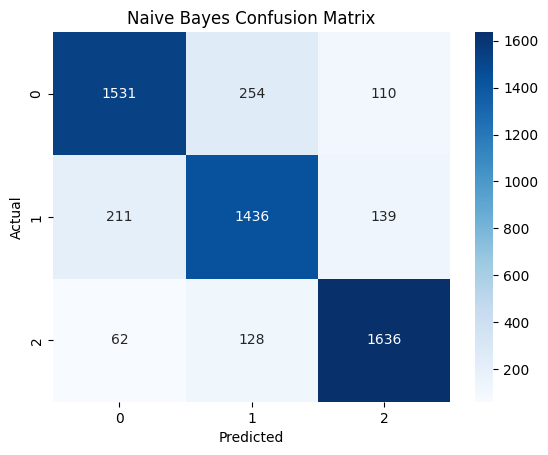

In [28]:
# Naive Bayes Confusion Matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues')
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Checking for overfitting

In [29]:
# Evaluate on Training Data
train_predictions = nb_model.predict(X_train)
print("Training Accuracy: ", accuracy_score(y_train, train_predictions))

# Evaluate on Test Data
test_predictions = nb_model.predict(X_test)
print("Test Accuracy: ", accuracy_score(y_test, test_predictions))

Training Accuracy:  0.8721568983520225
Test Accuracy:  0.8358452878155075


#### Support Vector Machines (SVM)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

# Initialize and train the SVM model
svm_model = SVC(kernel='linear', random_state=42)  # Linear kernel for text classification
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate the SVM model
print("SVM Model Evaluation:")
print(classification_report(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
# Calculate and display the weighted F1 score
print('Weighted f1-score:', f1_score(y_pred_svm, y_test, average='weighted'))

SVM Model Evaluation:
              precision    recall  f1-score   support

          -1       0.88      0.80      0.84      1895
           0       0.77      0.87      0.81      1786
           1       0.90      0.88      0.89      1826

    accuracy                           0.85      5507
   macro avg       0.85      0.85      0.85      5507
weighted avg       0.85      0.85      0.85      5507

Accuracy: 0.8471036862175413
Weighted f1-score: 0.8463114086861971


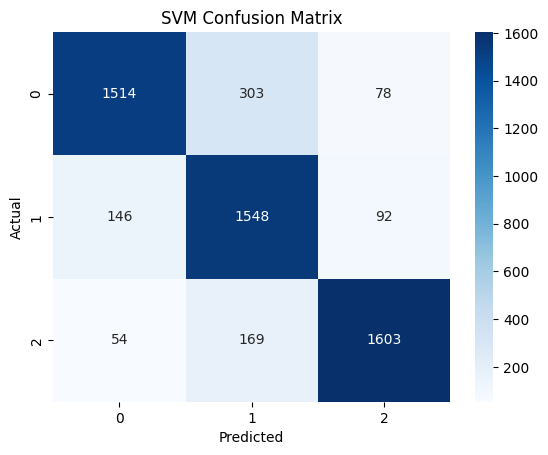

In [31]:
# SVM Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Checking for overfitting

In [32]:
# Evaluate on Training Data
train_predictions = svm_model.predict(X_train)
print("Training Accuracy: ", accuracy_score(y_train, train_predictions))

# Evaluate on Test Data
test_predictions = svm_model.predict(X_test)
print("Test Accuracy: ", accuracy_score(y_test, test_predictions))

Training Accuracy:  0.9043900667362782
Test Accuracy:  0.8471036862175413


#### Logistic Regression

In [33]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

# Train the Logistic Regression Model
lr_model = LogisticRegression(max_iter=10000)
lr_model.fit(X_train, y_train)

# Make Predictions and Evaluate the Model
y_pred_lr = lr_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_lr)
print('LogisticRegression:')
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred_lr))

# Calculate and display the weighted F1 score
print('Weighted f1-score:', f1_score(y_pred_lr, y_test, average='weighted'))

LogisticRegression:
Accuracy: 0.834029417105502
              precision    recall  f1-score   support

          -1       0.87      0.79      0.83      1895
           0       0.75      0.86      0.80      1786
           1       0.90      0.85      0.88      1826

    accuracy                           0.83      5507
   macro avg       0.84      0.83      0.83      5507
weighted avg       0.84      0.83      0.84      5507

Weighted f1-score: 0.8329147144349925


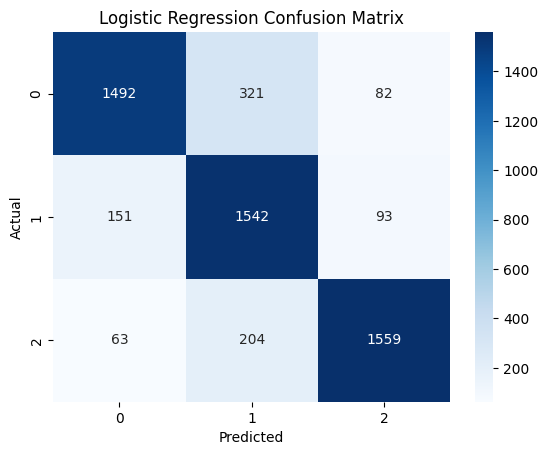

In [34]:
# SVM Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Checking for overfitting

In [35]:
# Evaluate on Training Data
train_predictions = lr_model.predict(X_train)
print("Training Accuracy: ", accuracy_score(y_train, train_predictions))

# Evaluate on Test Data
test_predictions = lr_model.predict(X_test)
print("Test Accuracy: ", accuracy_score(y_test, test_predictions))

Training Accuracy:  0.886548327053162
Test Accuracy:  0.834029417105502


#### Hyperparameter Tuning

In [36]:
# Initialize the SVM model
svm_model = SVC()

# Define a smaller parameter grid
param_grid = {
    'C': [0.1, 1, 10],           # Fewer values for C
    'kernel': ['linear', 'rbf'],  # Only focus on linear and rbf kernels
    'gamma': ['scale', 'auto']    # Keep gamma simple
}

# Initialize GridSearchCV with 3-fold cross-validation to reduce computation time
grid_search = GridSearchCV(svm_model, param_grid, cv=3, scoring='accuracy', verbose=1)

# Fit the model on the training data (use SMOTE-processed data here)
grid_search.fit(X_smote, y_smote)

# Print the best hyperparameters found by GridSearch
print("Best hyperparameters found: ", grid_search.best_params_)

# Train the model with the best hyperparameters
best_svm = grid_search.best_estimator_

# Evaluate the model on the test set
best_svm.fit(X_smote, y_smote)
y_pred_svm = best_svm.predict(X_test)

# Print evaluation metrics for the best model
from sklearn.metrics import classification_report, accuracy_score
print("Best SVM Model Evaluation:")
print(classification_report(y_test, y_pred_svm))
print("Accuracy: ", accuracy_score(y_test, y_pred_svm))

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best hyperparameters found:  {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Best SVM Model Evaluation:
              precision    recall  f1-score   support

          -1       0.98      0.96      0.97      1895
           0       0.92      0.96      0.94      1786
           1       0.97      0.95      0.96      1826

    accuracy                           0.96      5507
   macro avg       0.96      0.96      0.96      5507
weighted avg       0.96      0.96      0.96      5507

Accuracy:  0.9560559288178682


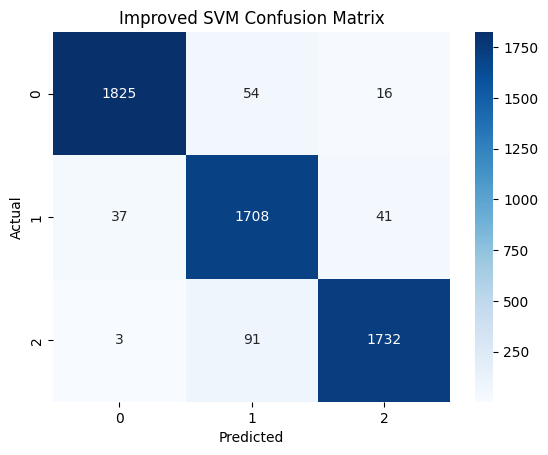

In [37]:
# SVM Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Improved SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [38]:
# Evaluate on Training Data
train_predictions = best_svm.predict(X_train)
print("Training Accuracy: ", accuracy_score(y_train, train_predictions))

# Evaluate on Test Data
test_predictions = best_svm.predict(X_test)
print("Test Accuracy: ", accuracy_score(y_test, test_predictions))

Training Accuracy:  0.9559631361510873
Test Accuracy:  0.9560559288178682
